In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from collections import Counter
import scipy as sp
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.preprocessing import QuantileTransformer,StandardScaler
from sklearn.compose import TransformedTargetRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline






In [2]:
df=pd.read_csv("https://vikas-bucket0809.s3.ca-central-1.amazonaws.com/train.csv")
df.drop(['policy_id','area_cluster','length','width','height','gross_weight','displacement','turning_radius','is_front_fog_lights','is_rear_window_wiper'], axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.nunique()

policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
cylinder                                2
transmission_type                       2
gear_box                                2
steering_type                           3
is_rear_window_washer                   2
is_rear_window_defogger           

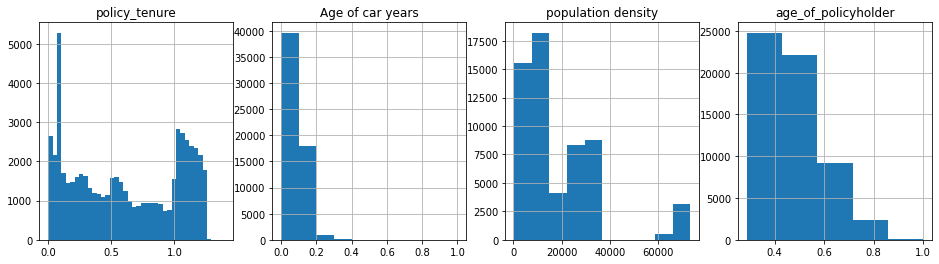

In [4]:
fig, (ax0, ax1, ax2,ax3) = plt.subplots(ncols=4, figsize=(16, 4))
ax0.set_title("policy_tenure")
_ = df["policy_tenure"].hist(bins=40, ax=ax0)
ax1.set_title("Age of car years")
_ = df["age_of_car"].hist(bins=10,  ax=ax1)
ax2.set_title("population density")
_ = df["population_density"].hist(bins=10, ax=ax2)
ax3.set_title("age_of_policyholder")
_ = df["age_of_policyholder"].hist(bins=5, ax=ax3)



In [5]:
claims=Counter(df['is_claim'])
print(
    "Fraction of low-risk customers = {0:.1%}".format(
        claims[0] / (claims[0]+claims[1]))
    )
print(
    "Fraction of high risk customers = {0:.1%}".format(
        claims[1] / (claims[0]+claims[1]))
    )

Fraction of low-risk customers = 93.6%
Fraction of high risk customers = 6.4%


In [6]:
print(
    "Average Frequency = {}".format(np.average(df["is_claim"]))
)

Average Frequency = 0.06396777717094485


In [7]:
column_list = list(df.select_dtypes(include=['O']).columns)
column_list

['segment',
 'model',
 'fuel_type',
 'max_torque',
 'max_power',
 'engine_type',
 'is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'steering_type',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [8]:
import re
binary_cols=[cols for cols in column_list if re.search(r'^is_',cols)]
binary_cols

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

In [9]:
# labelEncoder present in scikitlearn library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in binary_cols:
    df[x] = le.fit_transform(df[x])
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,segment,model,fuel_type,max_torque,max_power,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,...,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,...,0,1,1,1,0,1,1,1,2,0


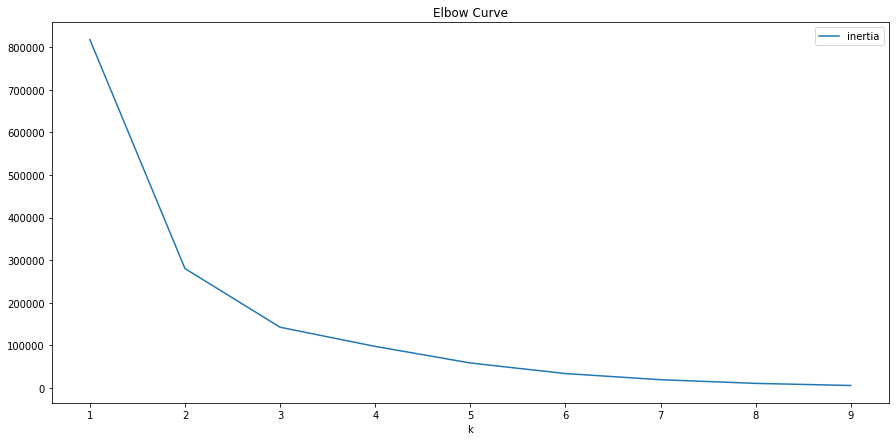

In [10]:
features=['model','segment','make']
for x in features:
    df[x] = le.fit_transform(df[x])
inertia=[]
k=list(range(1,10))
#Looking for best value of k
for i in k:
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df[features])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k ,figsize=(15,7))


In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[features])
df['car_features'] = kmeans.predict(df[features])
df['car_features']
df.drop(features,axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,car_features
0,0.515874,0.05,0.644231,4990,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,0,1,0,0,0,1,0,0,0
1,0.672619,0.02,0.375000,27003,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,0,1,0,0,0,1,0,0,0
2,0.841110,0.02,0.384615,4076,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,...,0,0,1,0,0,0,1,0,0,0
3,0.900277,0.11,0.432692,21622,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,...,1,1,1,1,1,1,1,2,0,2
4,0.596403,0.11,0.634615,34738,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,...,1,1,1,0,1,1,1,2,0,2


We are performing same steps of clustering as above.Here we are clustering car engine features like torque,power and engine type.

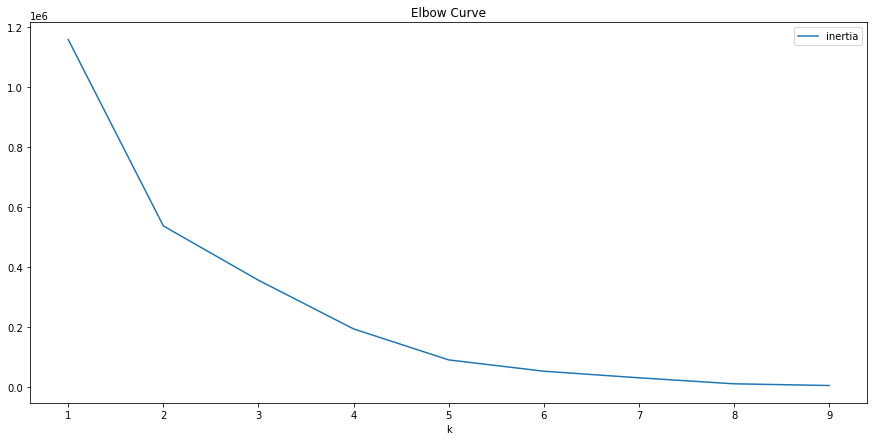

In [12]:
features=['max_torque','max_power','engine_type']
for x in features:
    df[x] = le.fit_transform(df[x])
inertia=[]
k=list(range(1,10))
#Looking for best value of k
for i in k:
    km=KMeans(n_clusters=i,random_state=0)
    km.fit(df[features])
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.plot.line(x="k", y="inertia", title="Elbow Curve", xticks=k,figsize=(15,7))

In [13]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[features])
df['power_range'] = kmeans.predict(df[features])
df['power_range']
df.drop(features,axis=1,inplace=True)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,fuel_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,car_features,power_range
0,0.515874,0.05,0.644231,4990,CNG,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,27003,CNG,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0.841110,0.02,0.384615,4076,CNG,2,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0.900277,0.11,0.432692,21622,Petrol,2,1,1,0,1,...,1,1,1,1,1,1,2,0,2,3
4,0.596403,0.11,0.634615,34738,Petrol,2,0,0,0,0,...,1,1,0,1,1,1,2,0,2,4


In [14]:
ohe_cols=list(df.select_dtypes(include=['O']).columns)
ohe_cols

['fuel_type', 'rear_brakes_type', 'transmission_type', 'steering_type']

In [15]:
ohe_df=pd.get_dummies(df[ohe_cols])
df=pd.concat([df, ohe_df], axis=1)
df=df.drop(columns=ohe_cols)
df.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,...,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
1,0.672619,0.02,0.375000,27003,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
2,0.841110,0.02,0.384615,4076,2,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,0.900277,0.11,0.432692,21622,2,1,1,0,1,1,...,0,0,1,0,1,1,0,1,0,0
4,0.596403,0.11,0.634615,34738,2,0,0,0,0,1,...,0,0,1,0,1,1,0,1,0,0


In [16]:
# computing number of rows
rows = len(df.axes[0])
# computing number of columns
cols = len(df.axes[1])
print("Number of Rows: ", rows)
print("Number of Columns: ", cols)

Number of Rows:  58592
Number of Columns:  36


In [17]:
# Create our features
X=df.drop('is_claim',axis=1)
# Create our target
y = df['is_claim']

In [18]:
Counter(y)

Counter({0: 54844, 1: 3748})

OverSampling

In [19]:
# Resample the training data with the SMOTEENN

from imblearn.combine import SMOTEENN
X_sampled,y_sampled=SMOTEENN().fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled)
std_scaler=StandardScaler()
X_train_scaled=std_scaler.fit_transform(X_train)
X_test_scaled=std_scaler.fit_transform(X_test)

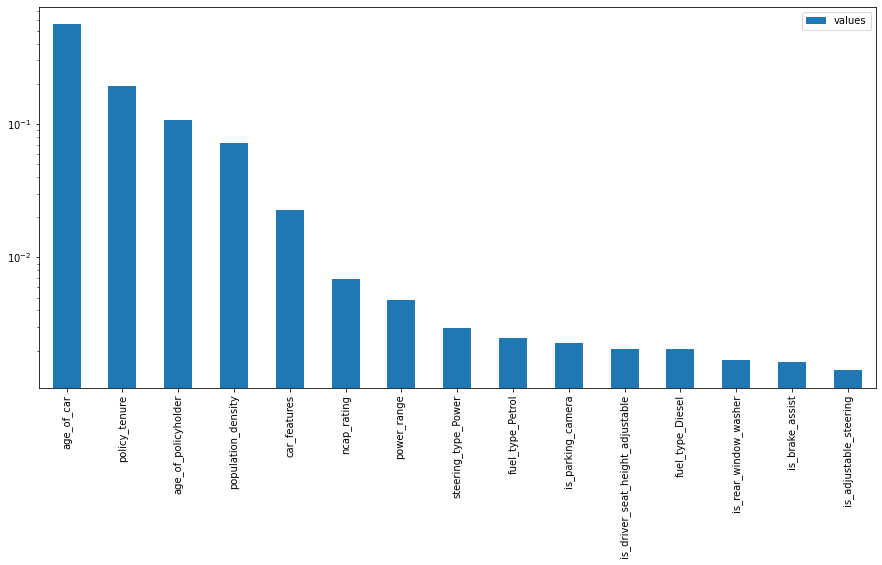

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(X_train_scaled, y_train)

# List the features sorted in descending order by feature importance
feature_vals=[]
feature_names=[]
features_rank = sorted(zip(dtc.feature_importances_, X.columns), reverse=True)
for feature in features_rank[:15]:
    feature_vals.append(feature[0])
    feature_names.append(feature[1])

feature_df=pd.DataFrame({'name':feature_names,'values':feature_vals},index=feature_names)
feature_df.plot.bar(figsize=(15,7),log=True)

In [22]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression(class_weight="balanced",max_iter=800,verbose=11)
lreg=lreg.fit(X_train_scaled, y_train)
# Predicting the Target variable
y_pred = lreg.predict(X_test_scaled)
accuracy = lreg.score(X_test_scaled, y_test)
print(classification_report(y_test, y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.58      0.62      0.60      8291
           1       0.68      0.64      0.66     10292

    accuracy                           0.63     18583
   macro avg       0.63      0.63      0.63     18583
weighted avg       0.63      0.63      0.63     18583



[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s finished


This model has most precesion 

In [23]:
dtr = TransformedTargetRegressor(regressor=DecisionTreeRegressor(), transformer=QuantileTransformer(output_distribution='normal'))
dtr = dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.90      0.91      8291
           1       0.92      0.93      0.93     10292

    accuracy                           0.92     18583
   macro avg       0.92      0.92      0.92     18583
weighted avg       0.92      0.92      0.92     18583



In [25]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


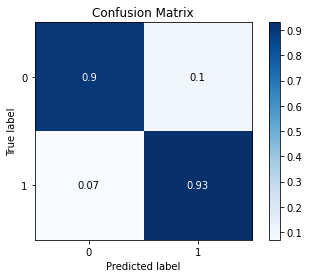

In [26]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True, title = 'Confusion Matrix')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent work

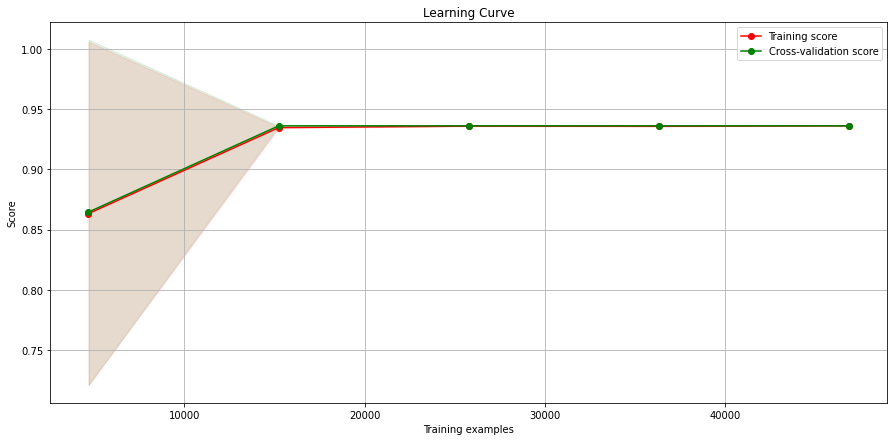

In [ ]:

skplt.estimators.plot_learning_curve(lreg, X, y,figsize=(15,7))
plt.show()